<a href="https://colab.research.google.com/github/erandime/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Importing the dependencies**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from collections import Counter

In [4]:
# load the csv data to a pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option("display.max_columns", None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**2. Data loading and understanding**

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
#df["TotalCharges"] = df["TotalCharges"].astype(float)

In [10]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
len(df[df["TotalCharges"]==" "])

11

In [12]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [13]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
# printing the unique values in all the categorical columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen ['No' 'Yes']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No in

In [17]:
# Features to clean: merge 'No internet service' and 'No phone service' into 'No'
cols_to_clean = [
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Replace values
for col in cols_to_clean:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


In [18]:
for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen ['No' 'Yes']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes']
--------------------------------------------------
OnlineBackup ['Yes' 'No']
--------------------------------------------------
DeviceProtection ['No' 'Yes']
--------------------------------------------------
TechSupport ['No' 'Yes']
--------------------------------------------------
StreamingTV ['No' 'Yes']
--------------------------------------------------
StreamingMovies ['No' 'Yes']
--------------------------------

In [19]:
# checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights:**
1. Customer ID removed as it is not required for modelling.
2. No missing values in the dataset
3. Values in the TotalCharges column for new customers were replaced with 0
4. Senior citizen data type was changed to match the datatype
5. Values 'No internet service' and 'No phone service' were merged into into 'No'
6. Class imbalance identified in the target

**3. Exploratory Data Analysis (EDA)**

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Analysis of Numerical Features

In [21]:
df[numerical_features_list].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [22]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

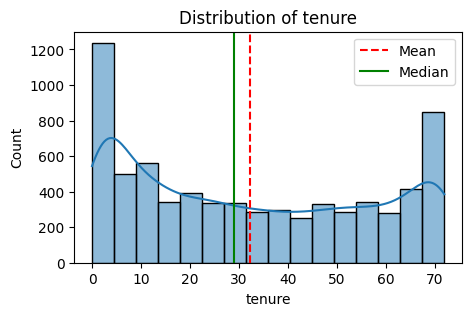

In [23]:
plot_histogram(df, "tenure")

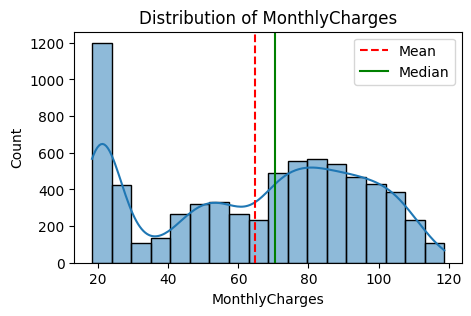

In [24]:
plot_histogram(df, "MonthlyCharges")

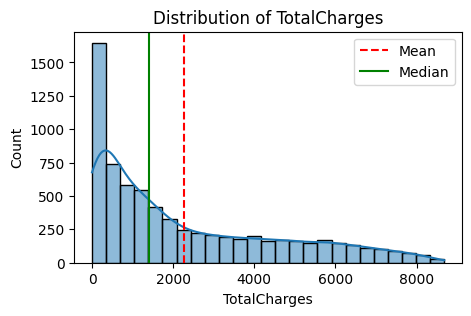

In [25]:
plot_histogram(df, "TotalCharges")

In [26]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

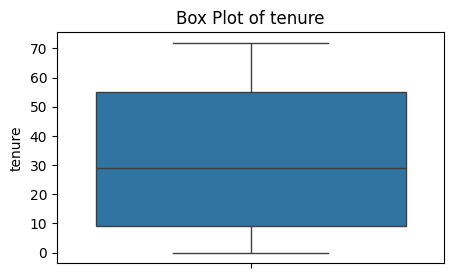

In [28]:
plot_boxplot(df, "tenure")

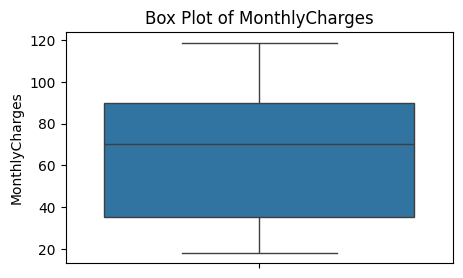

In [29]:
plot_boxplot(df, "MonthlyCharges")

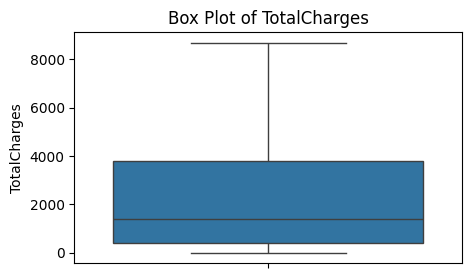

In [30]:
plot_boxplot(df, "TotalCharges")

Correlation Heatmap for numerical columns

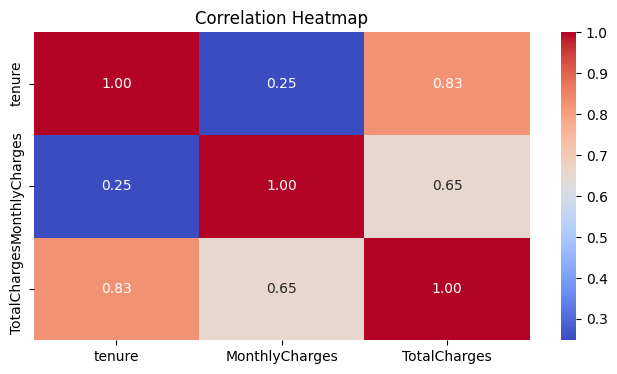

In [31]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

TotalCharges is strongly correlated with tenure, because it’s effectively:
TotalCharges ≈ MonthlyCharges × tenure

This high correlation suggests redundancy, which can:

Affect linear models (like Logistic Regression) due to multicollinearity

Be less of a problem for tree-based models (like Random Forest, XGBoost), which handle correlated features better

Box plots for visualizing Numerical features vs Churn




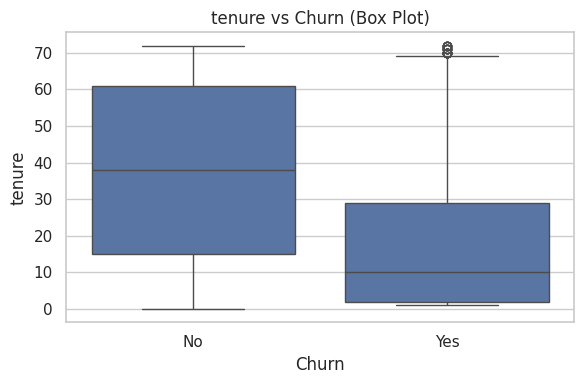

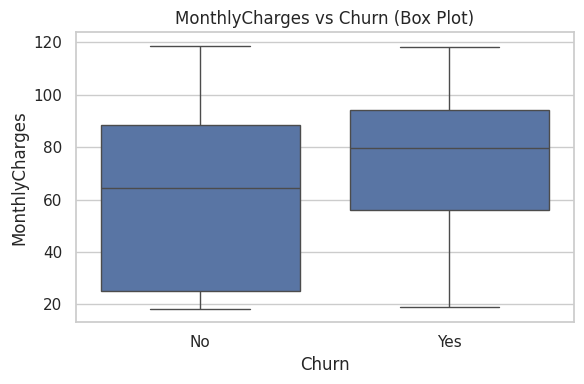

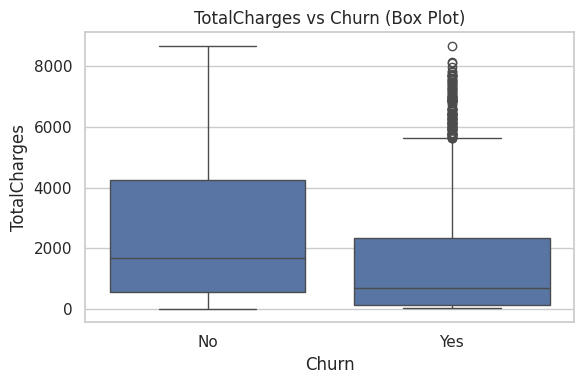

In [32]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.set(style="whitegrid")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs Churn (Box Plot)')
    plt.tight_layout()
    plt.show()

In [33]:
df.groupby('Churn').mean(numerical_cols)

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2549.911442
Yes,17.979133,74.441332,1531.796094


Analysis of Categorical features

*Stacked bar charts for categorical columns vs churn*



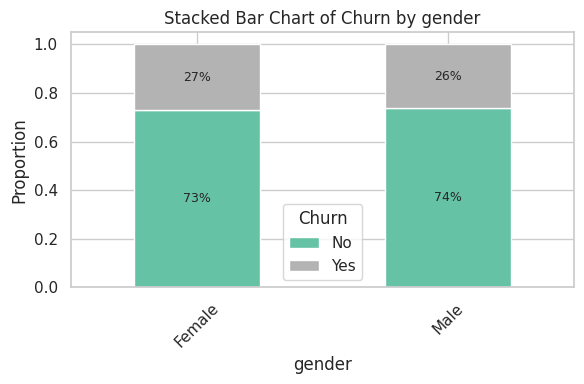

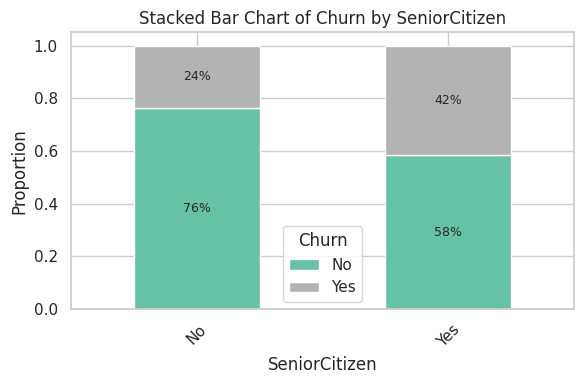

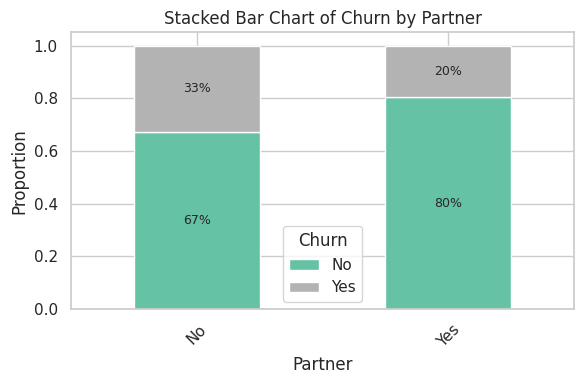

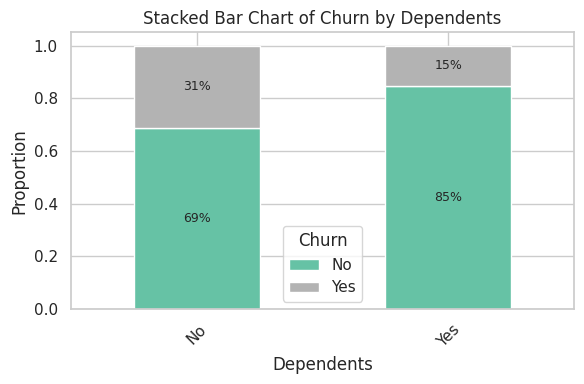

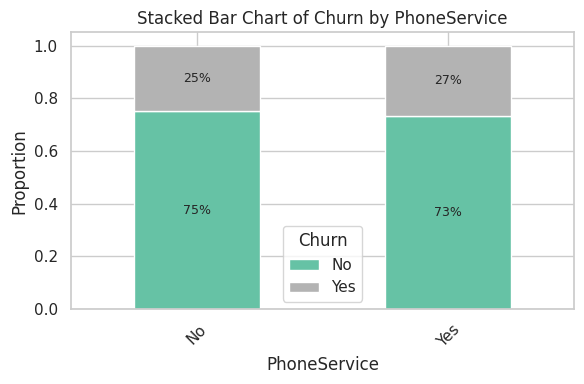

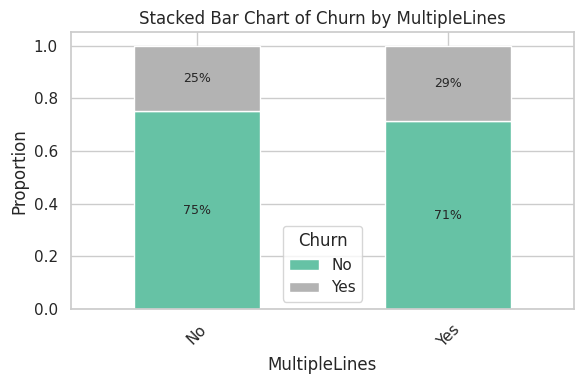

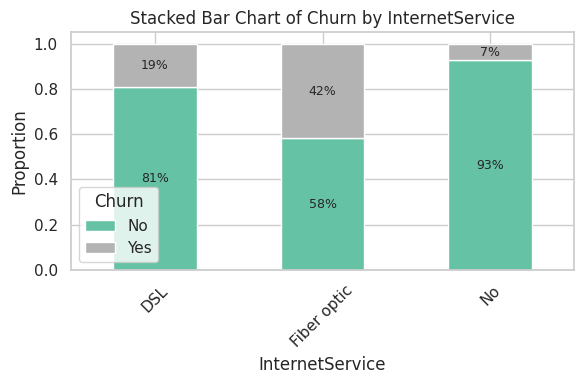

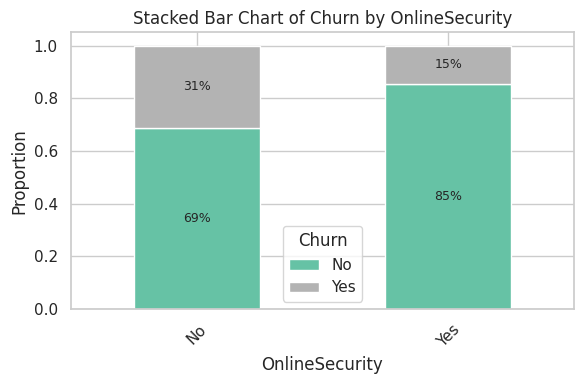

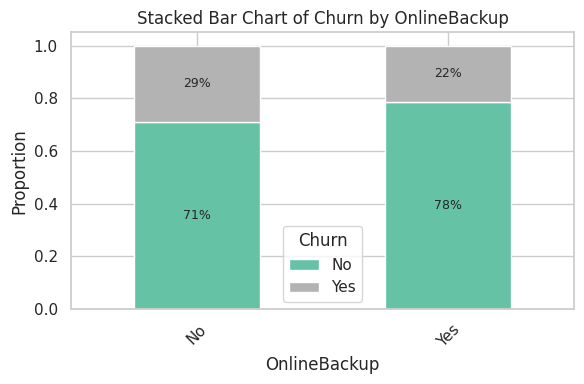

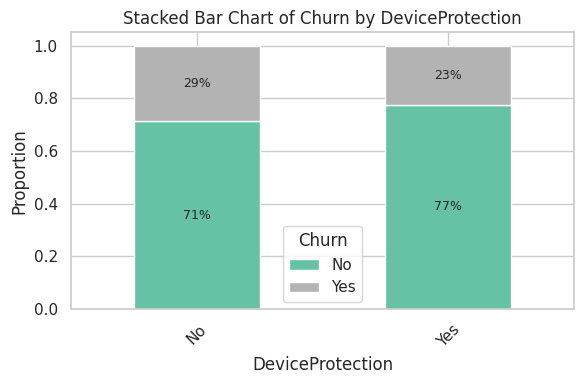

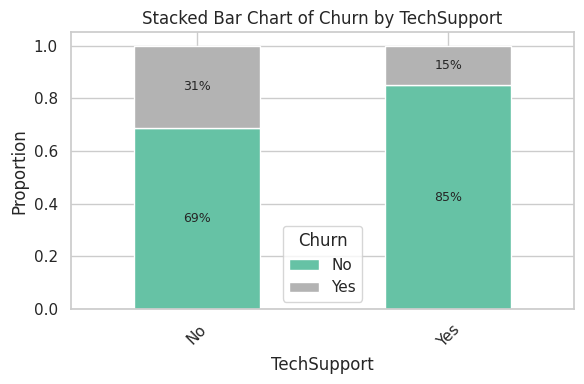

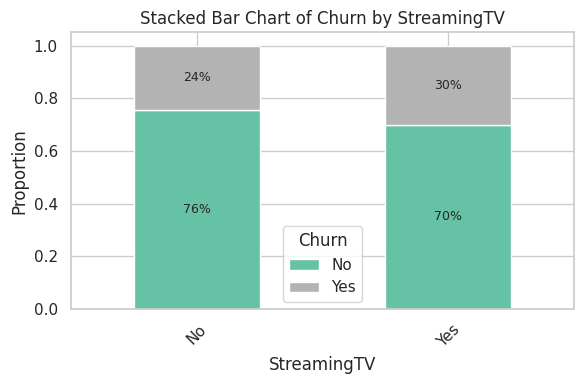

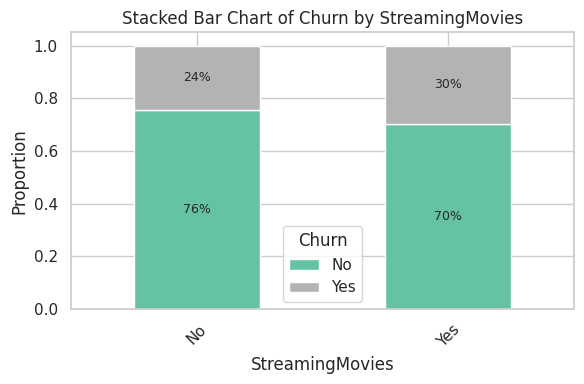

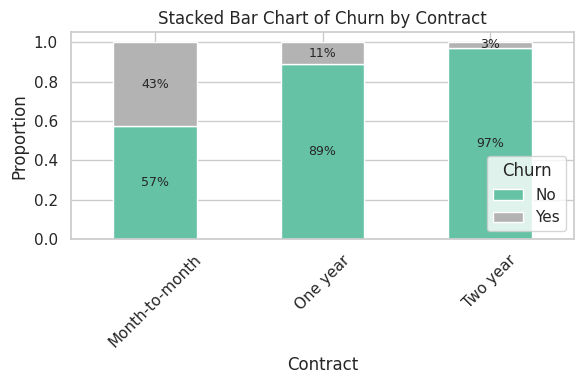

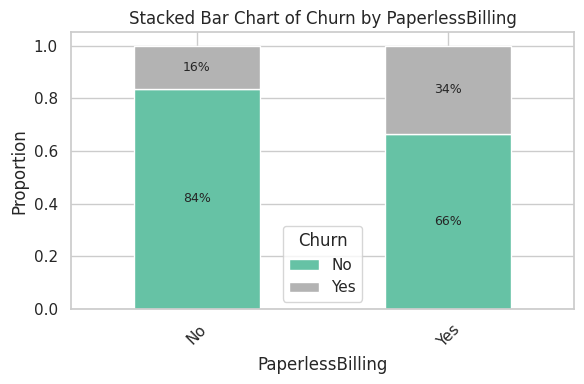

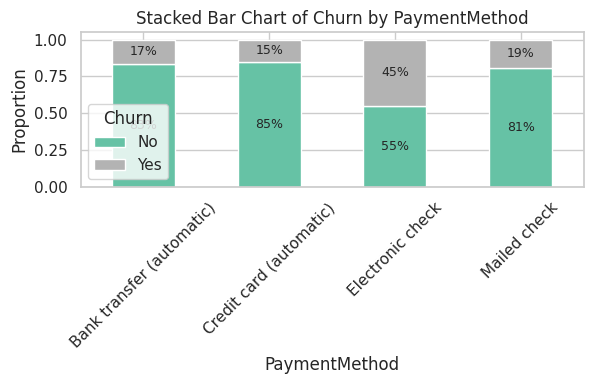

In [34]:
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols.remove("Churn")

# Filter only churned customers
churned_df = df[df['Churn'] == 'Yes']

for col in object_cols:
    plt.figure(figsize=(6, 4))

    # Prepare normalized data
    stacked_df = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    stacked_df = stacked_df.div(stacked_df.sum(axis=1), axis=0)

    # Plot stacked bar
    ax = plt.gca()
    stacked_df.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')
    plt.title(f'Stacked Bar Chart of Churn by {col}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')

    # Add proportion labels
    for i, category in enumerate(stacked_df.index):
        cumulative = 0
        for churn_class in stacked_df.columns:
            height = stacked_df.loc[category, churn_class]
            if height > 0:
                ax.text(i, cumulative + height / 2, f'{height:.0%}', ha='center', va='center', fontsize=9)
                cumulative += height

    plt.tight_layout()
    plt.show()


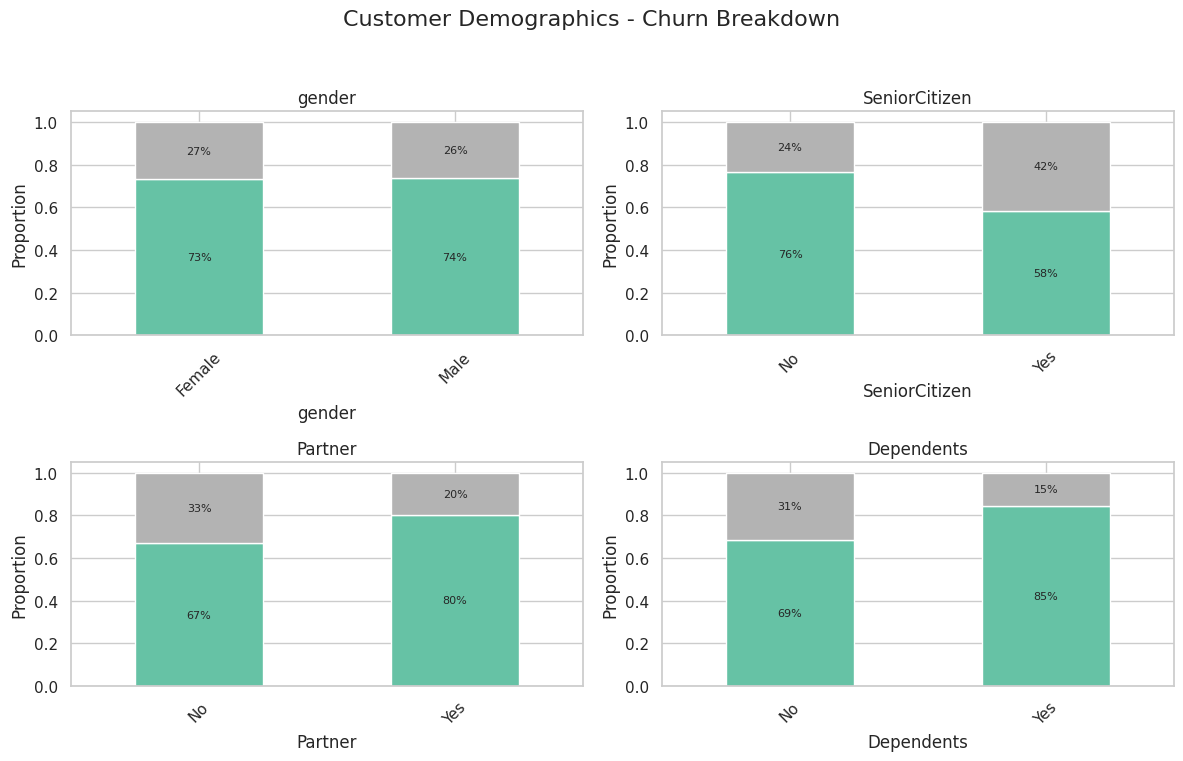

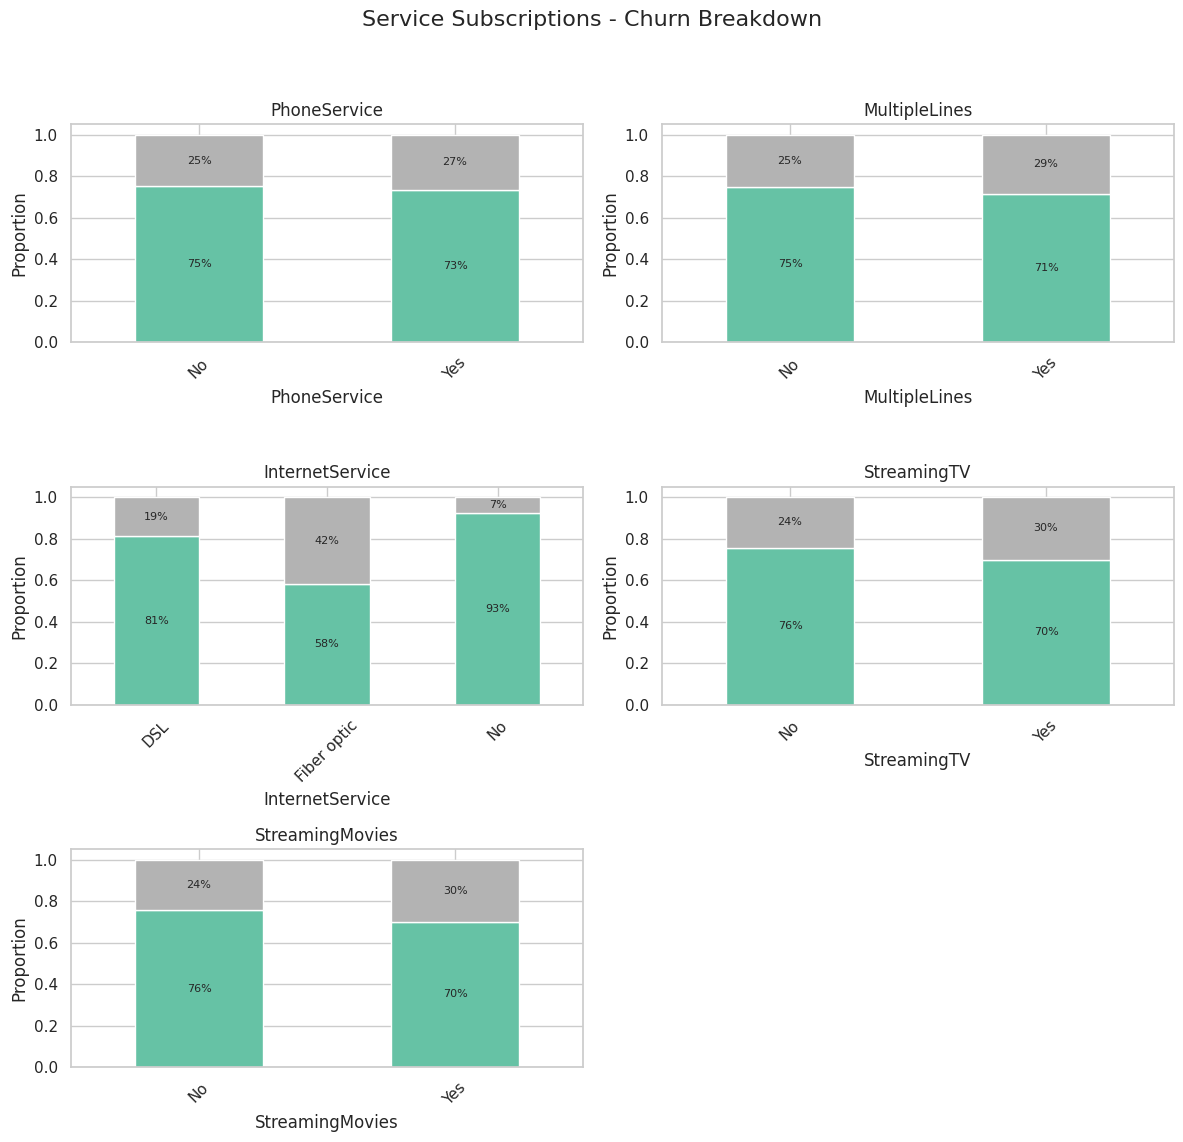

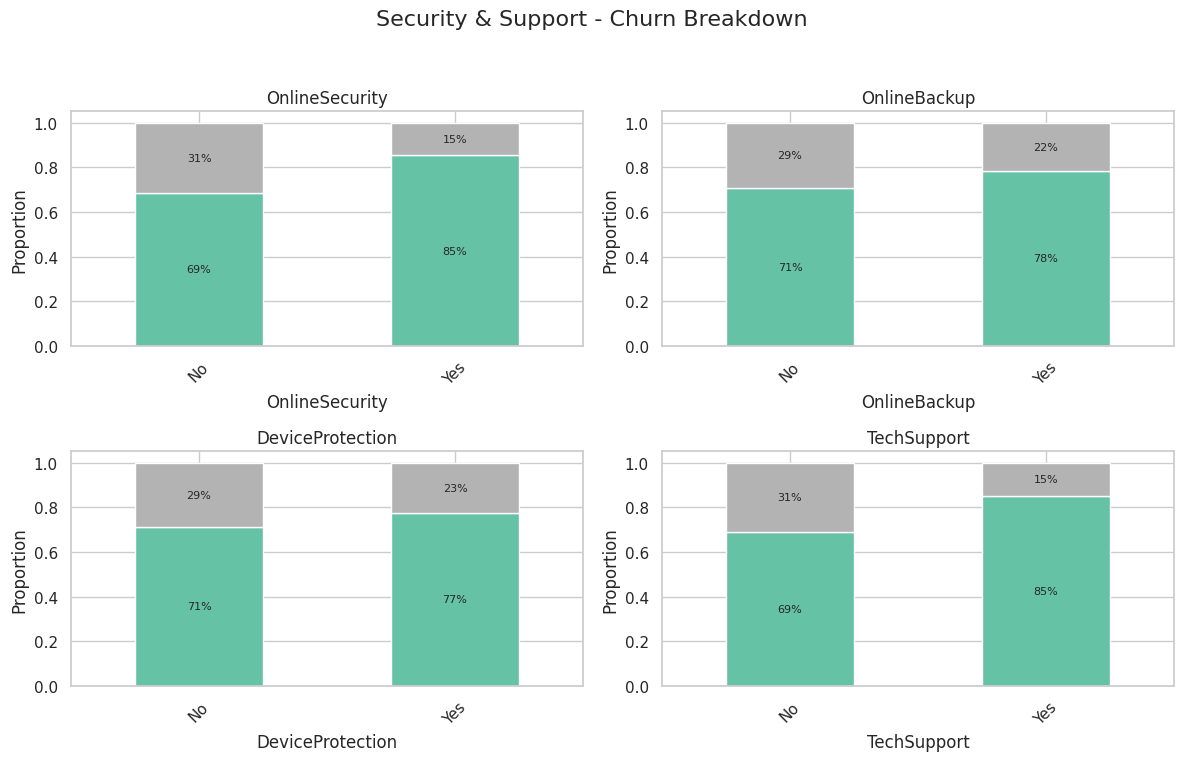

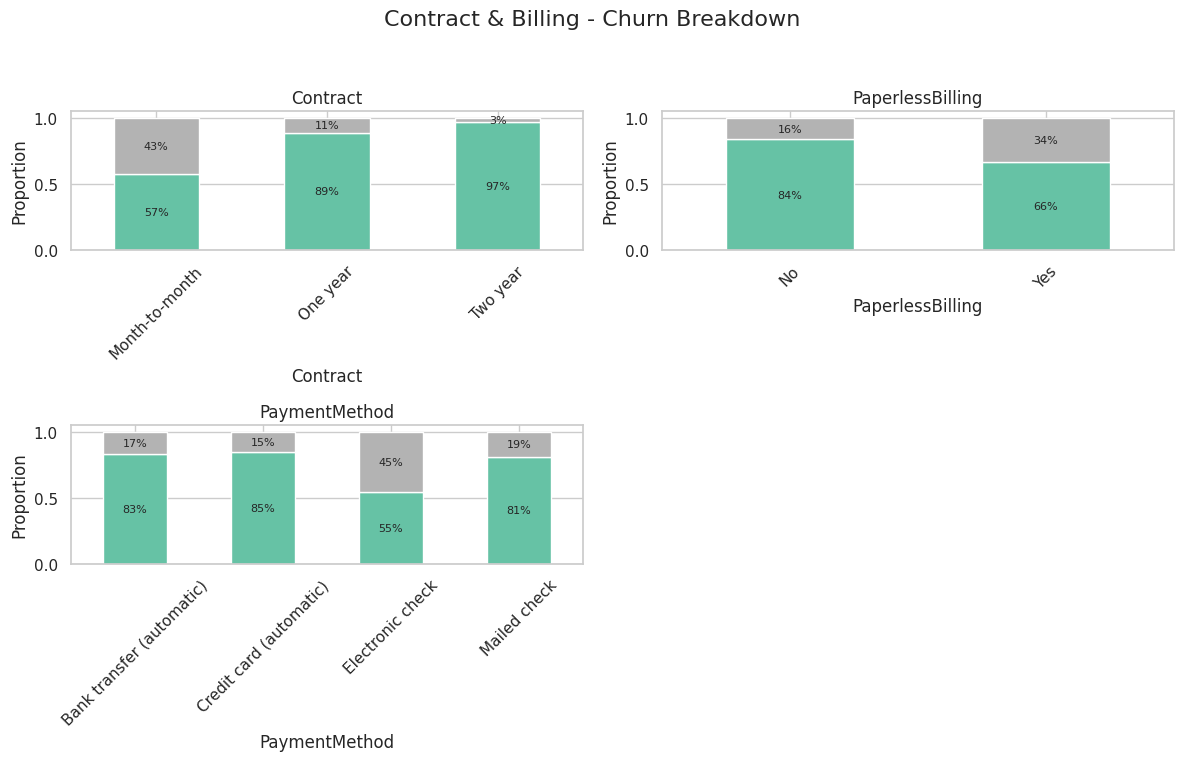

In [35]:
# Define groups
groups = {
    "Customer Demographics": ['gender', 'SeniorCitizen', 'Partner', 'Dependents'],
    "Service Subscriptions": ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies'],
    "Security & Support": ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'],
    "Contract & Billing": ['Contract', 'PaperlessBilling', 'PaymentMethod']
}

# Function toGroup variables logically and plot
def plot_grouped_churn_stacked(groups_dict):
    for group_name, cols in groups_dict.items():
        rows = (len(cols) + 1) // 2
        fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
        axes = axes.flatten()

        for i, col in enumerate(cols):
            ax = axes[i]
            grouped = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
            grouped = grouped.div(grouped.sum(axis=1), axis=0)

            # Plot the stacked bar
            grouped.plot(kind='bar', stacked=True, ax=ax, colormap='Set2', legend=False)
            ax.set_title(f'{col}')
            ax.set_ylabel('Proportion')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

            #Add proportion labels
            for bar_idx, category in enumerate(grouped.index):
                cumulative = 0
                for churn_class in grouped.columns:
                    height = grouped.loc[category, churn_class]
                    if height > 0:
                        ax.text(bar_idx, cumulative + height / 2, f'{height:.0%}',
                                ha='center', va='center', fontsize=8)
                        cumulative += height

        # Remove unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        fig.suptitle(f'{group_name} - Churn Breakdown', fontsize=16)
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
# Call the function
plot_grouped_churn_stacked(groups)

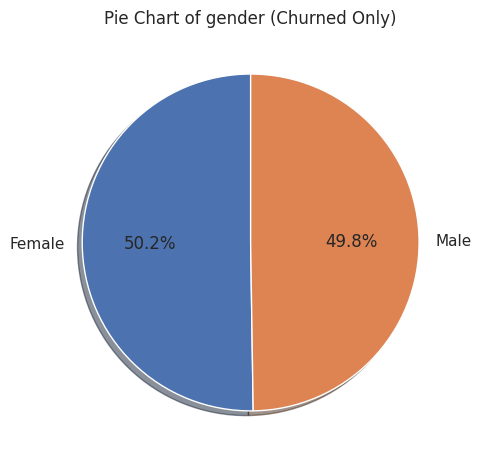

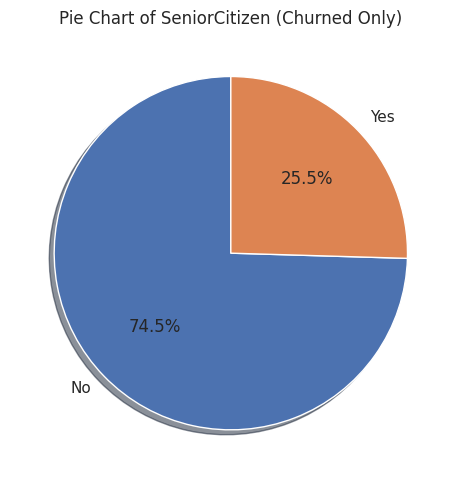

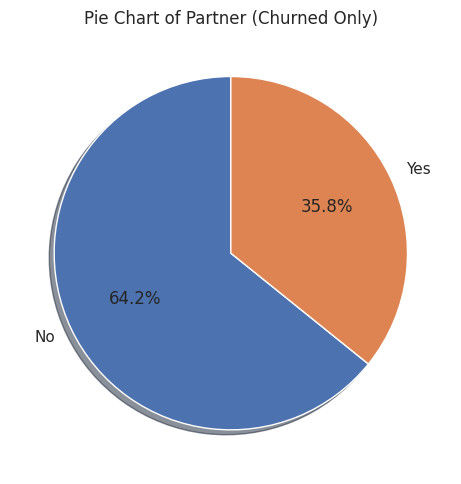

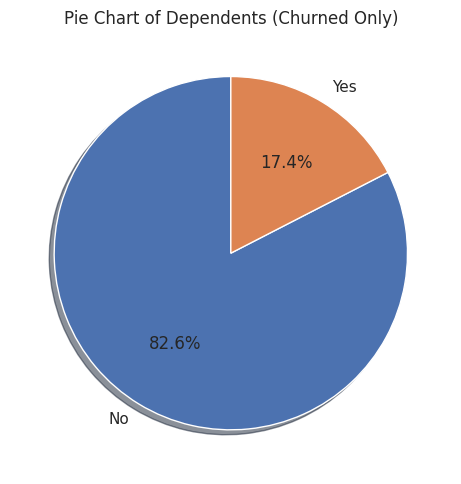

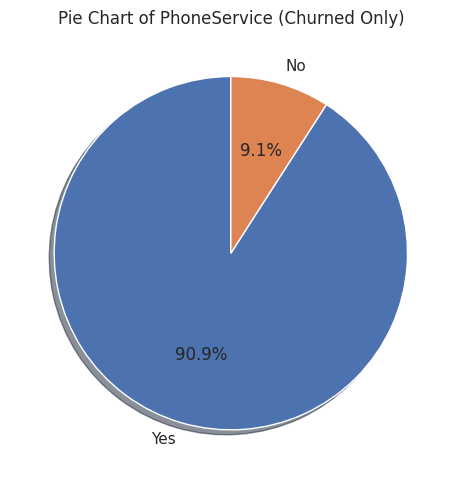

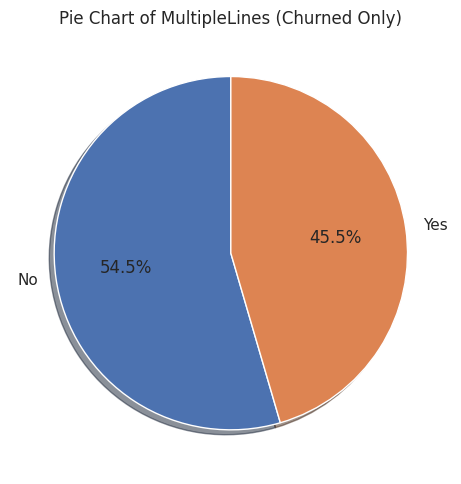

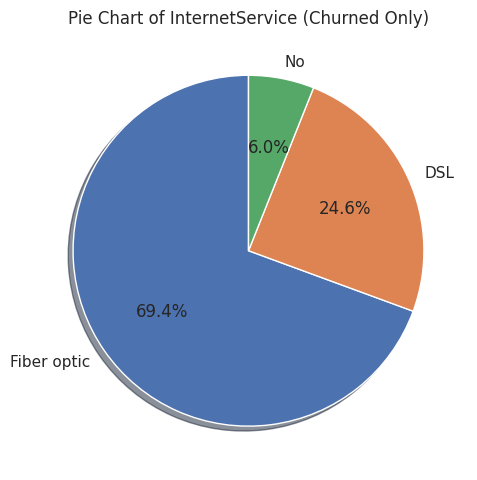

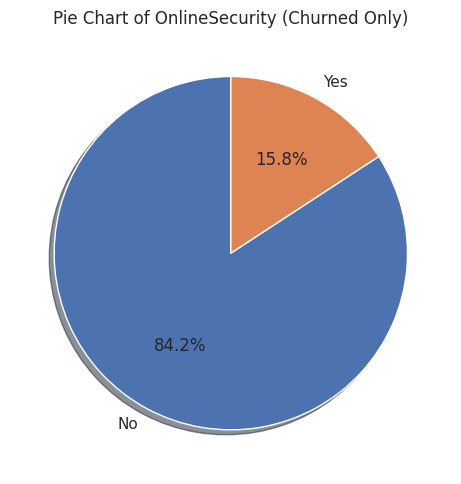

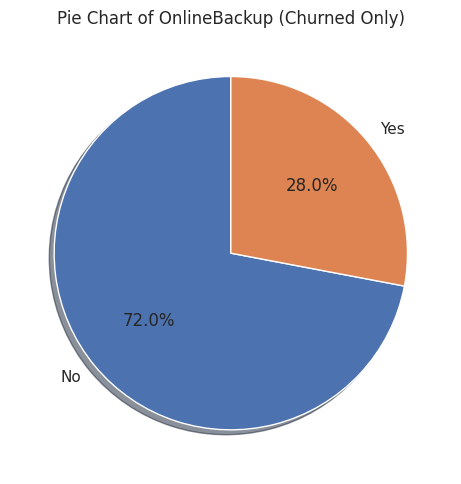

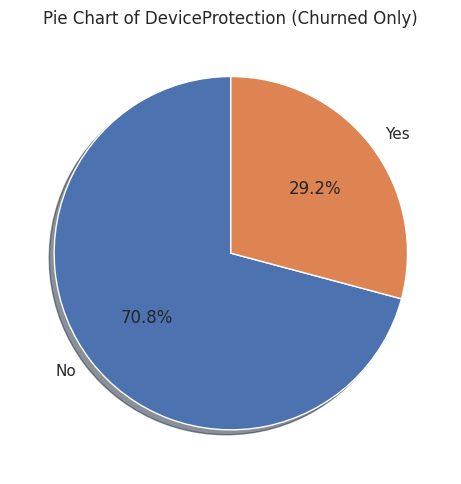

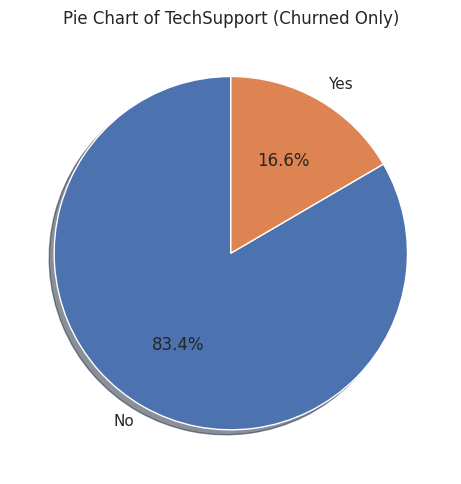

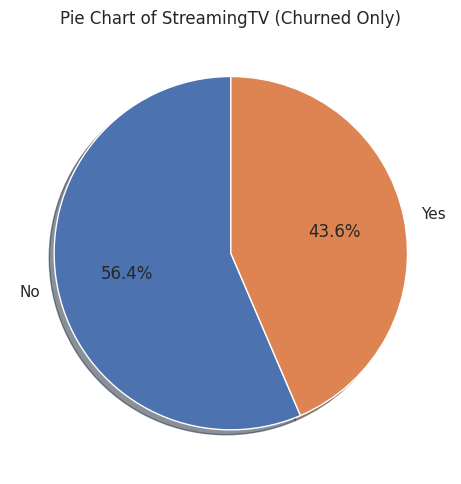

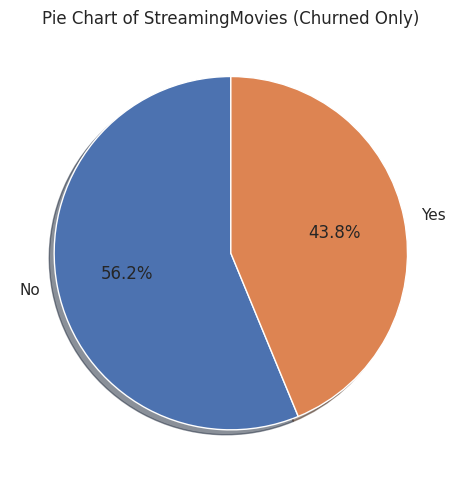

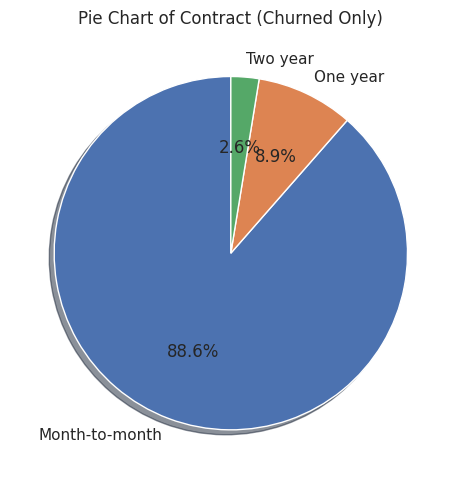

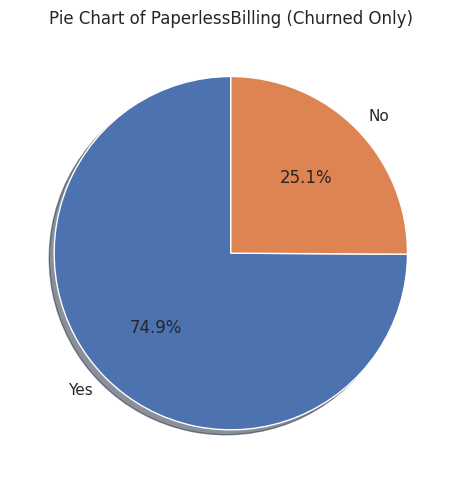

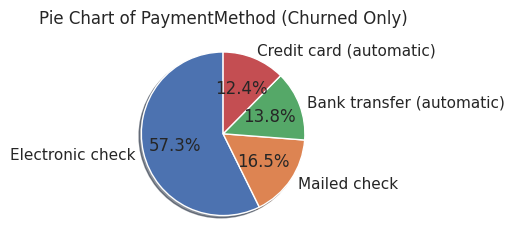

In [36]:
# Plot pie charts for churned customers only
for col in object_cols:
    plt.figure(figsize=(5, 5))
    churned_df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        shadow=True
    )
    plt.title(f'Pie Chart of {col} (Churned Only)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

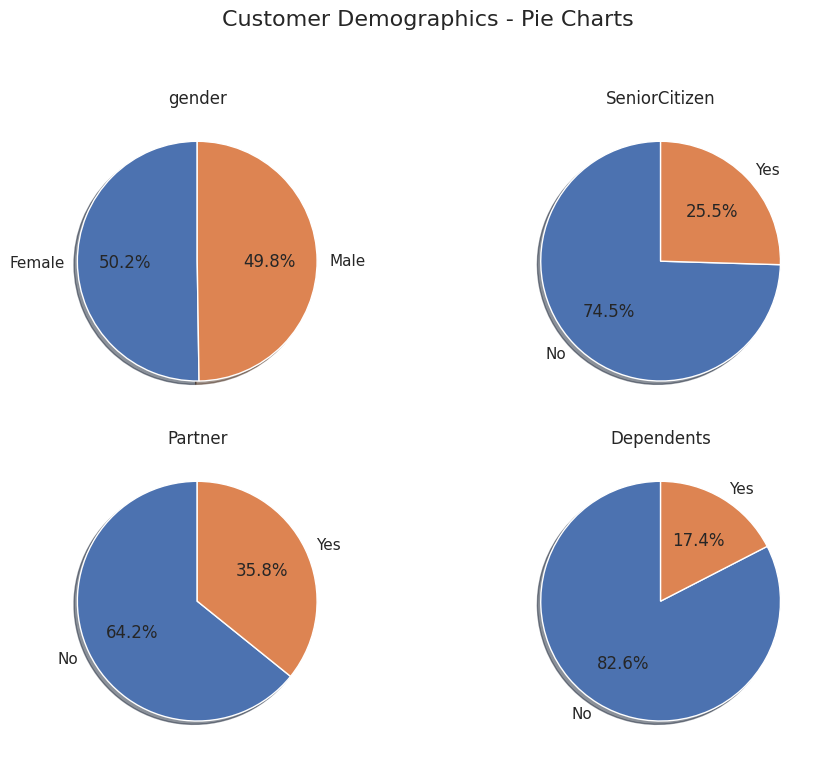

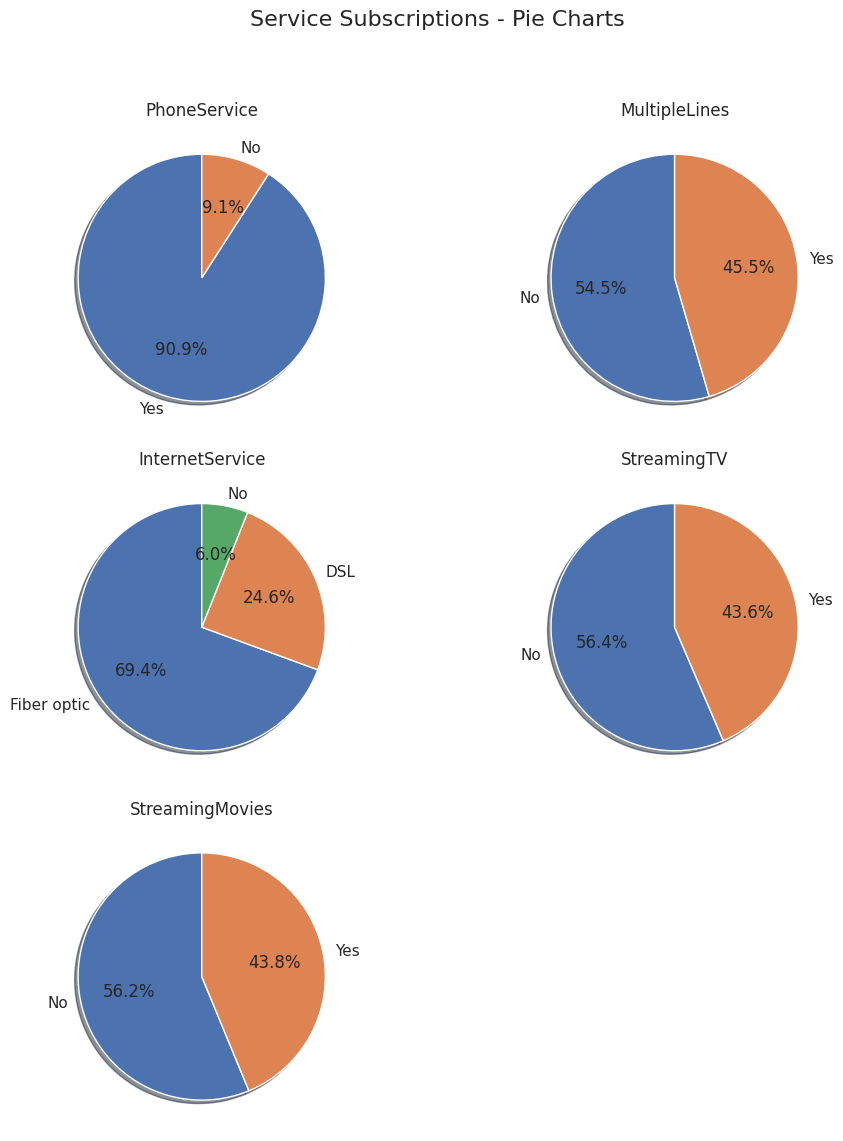

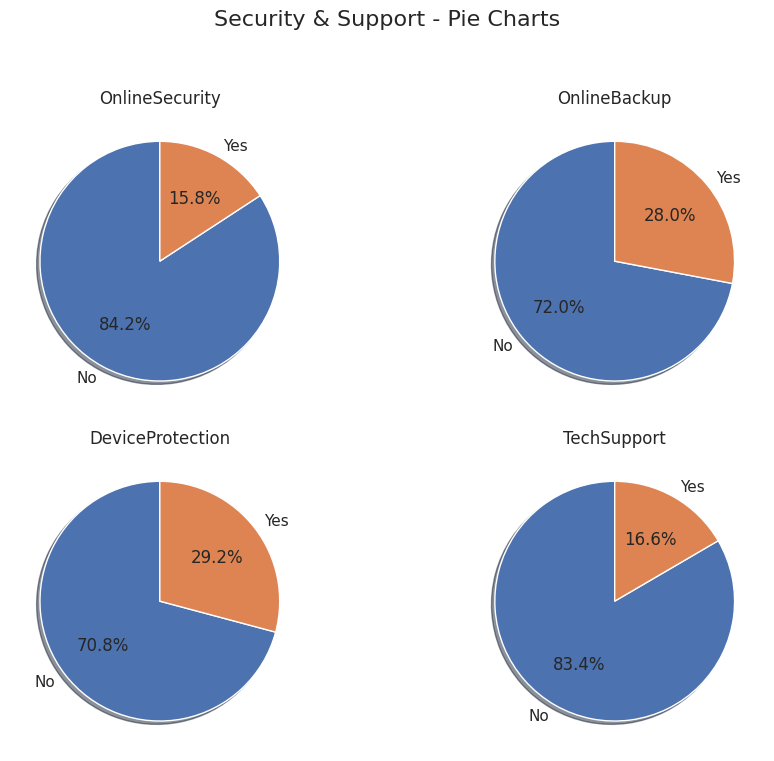

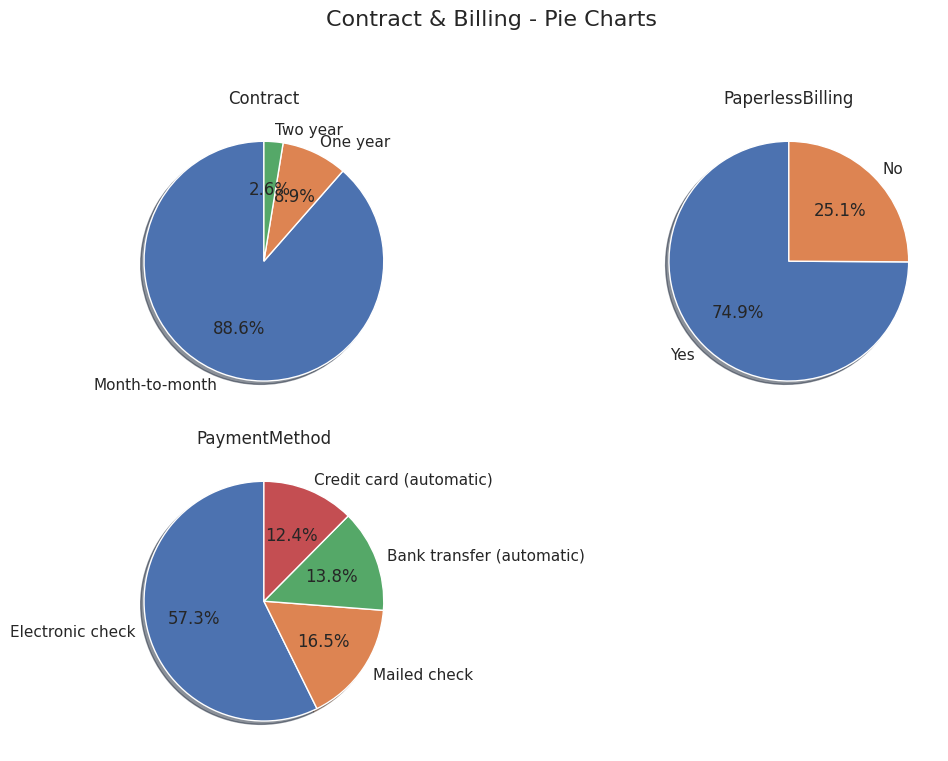

In [37]:
# Plot each group in one figure using subplots
for group_name, cols in groups.items():
    n = len(cols)
    rows = (n + 1) // 2
    fig, axes = plt.subplots(rows, 2, figsize=(10, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        churned_df[col].value_counts().plot.pie(
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            ax=ax
        )
        ax.set_title(f'{col}')
        ax.set_ylabel('')

    # Remove any unused subplot axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'{group_name} - Pie Charts', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**4. Data Preprocessing**

In [38]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label encoding of target column

In [39]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})
df.head(3)

<ipython-input-39-3154f5339aba>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [40]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Label encoding of categorical fetaures

In [41]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [42]:
print(object_columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [43]:
# Initialize a dictionary to save the encoders
encoders = {}

# Apply label encoding and print the label-value mapping
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

    # Print label mappings (what label became what number)
    print(f"\n🔤 Encoding for column: {column}")
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    for label, value in mapping.items():
        print(f"  {label} → {value}")

# Save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)



🔤 Encoding for column: gender
  Female → 0
  Male → 1

🔤 Encoding for column: SeniorCitizen
  No → 0
  Yes → 1

🔤 Encoding for column: Partner
  No → 0
  Yes → 1

🔤 Encoding for column: Dependents
  No → 0
  Yes → 1

🔤 Encoding for column: PhoneService
  No → 0
  Yes → 1

🔤 Encoding for column: MultipleLines
  No → 0
  Yes → 1

🔤 Encoding for column: InternetService
  DSL → 0
  Fiber optic → 1
  No → 2

🔤 Encoding for column: OnlineSecurity
  No → 0
  Yes → 1

🔤 Encoding for column: OnlineBackup
  No → 0
  Yes → 1

🔤 Encoding for column: DeviceProtection
  No → 0
  Yes → 1

🔤 Encoding for column: TechSupport
  No → 0
  Yes → 1

🔤 Encoding for column: StreamingTV
  No → 0
  Yes → 1

🔤 Encoding for column: StreamingMovies
  No → 0
  Yes → 1

🔤 Encoding for column: Contract
  Month-to-month → 0
  One year → 1
  Two year → 2

🔤 Encoding for column: PaperlessBilling
  No → 0
  Yes → 1

🔤 Encoding for column: PaymentMethod
  Bank transfer (automatic) → 0
  Credit card (automatic) → 1
  Elec

In [44]:
encoders

{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [45]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


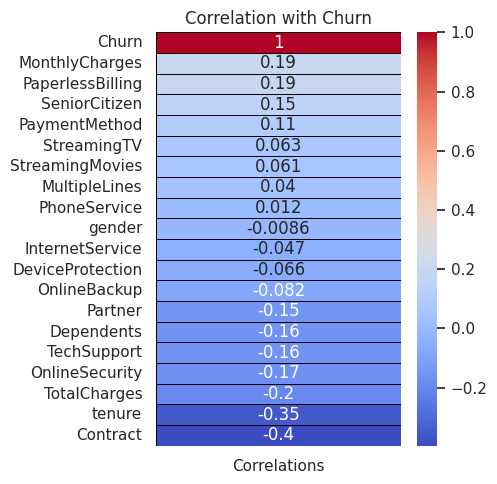

In [46]:
# Calculate correlation of each numeric feature with Churn
corr = df.corrwith(df['Churn']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')
plt.title('Correlation with Churn')
plt.tight_layout()
plt.show()

In [47]:
# Filter weakly correlated features
low_corr_features = corr[abs(corr['Correlations']) < 0.05]

# Print them
print("🔻 Features weakly correlated with Churn (|correlation| < 0.05):\n")
print(low_corr_features)


🔻 Features weakly correlated with Churn (|correlation| < 0.05):

                 Correlations
MultipleLines        0.040102
PhoneService         0.011942
gender              -0.008612
InternetService     -0.047291


Feature Selection

In [50]:
print(object_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


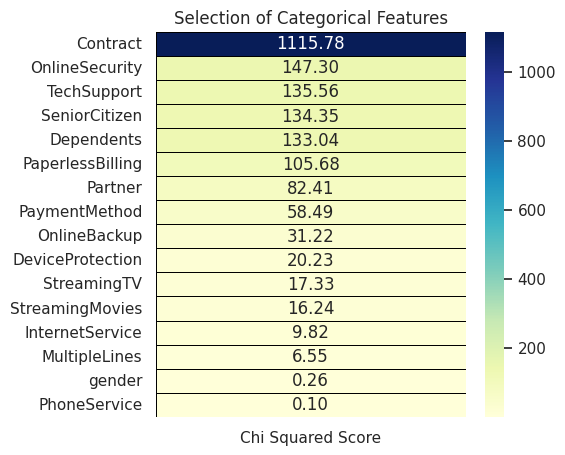

In [51]:
# Chi-squared test for categorical features
features = df[object_columns]
target = df['Churn']

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=features.columns, columns=['Chi Squared Score'])

# Plot heatmap
colors = "YlGnBu"
plt.figure(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='Chi Squared Score', ascending=False),
            annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()

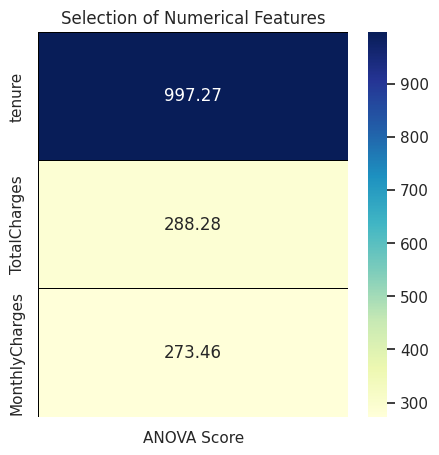

In [52]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
features = df[numerical_features]
target = df['Churn']

# ANOVA F-test
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Create DataFrame of scores
featureScores = pd.DataFrame(data=fit.scores_,
                             index=features.columns,
                             columns=['ANOVA Score']).round(2)

# Plot heatmap
colors = "YlGnBu"
plt.figure(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='ANOVA Score', ascending=False),
            annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()

In [53]:
df.drop(columns = ['PhoneService', 'gender'],inplace = True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Training and test data split**

In [54]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [55]:
# splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 17) (1409, 17) (5634,) (1409,)


In [58]:
print(y_train.value_counts(), y_test.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64 Churn
0    1036
1     373
Name: count, dtype: int64


**5. Model Training**

In [60]:
counter = Counter(y_train)
neg, pos = counter[0], counter[1]
scale_pos_weight = neg / pos


#list of models
models = [DecisionTreeClassifier(random_state=42, class_weight='balanced'), RandomForestClassifier(random_state=42, class_weight='balanced'), XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, eval_metric='logloss')]

In [61]:
def compare_models_train_test():

  for model in models:
    #training the model
    model.fit(X_train, y_train)

    #training data accuracy
    training_data_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(y_train, training_data_prediction)
    print("Accuracy score of the training data", model, " = ", training_data_accuracy)

    #evaluating the model
    test_data_prediction = model.predict(X_test)
    test_data_accuracy = accuracy_score(y_test, test_data_prediction)
    print("Accuracy score of the test data", model, " = ", test_data_accuracy)
    print("-"*50)

In [62]:
compare_models_train_test()

Accuracy score of the training data DecisionTreeClassifier(class_weight='balanced', random_state=42)  =  0.9973375931842385
Accuracy score of the test data DecisionTreeClassifier(class_weight='balanced', random_state=42)  =  0.7239176721078779
--------------------------------------------------
Accuracy score of the training data RandomForestClassifier(class_weight='balanced', random_state=42)  =  0.9976925807596734
Accuracy score of the test data RandomForestClassifier(class_weight='balanced', random_state=42)  =  0.7920511000709723
--------------------------------------------------
Accuracy score of the training data XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction

Cross Validation - Training with default hyperparameters

Decision Tree


In [63]:
cv_score_dt = cross_val_score(DecisionTreeClassifier(random_state=42, class_weight='balanced'), X_train, y_train, cv=5)
print(cv_score_dt)
mean_accuracy_dt = np.mean(cv_score_dt)
mean_accuracy_dt = mean_accuracy_dt*100
mean_accuracy_dt = round(mean_accuracy_dt, 2)
print(mean_accuracy_dt)

[0.71783496 0.71960958 0.73824312 0.74977817 0.73712256]
73.25


Random Forest

In [64]:
cv_score_dt = cross_val_score(RandomForestClassifier(random_state=42, class_weight='balanced'), X_train, y_train, cv=5)
print(cv_score_dt)
mean_accuracy_dt = np.mean(cv_score_dt)
mean_accuracy_dt = mean_accuracy_dt*100
mean_accuracy_dt = round(mean_accuracy_dt, 2)
print(mean_accuracy_dt)

[0.80479148 0.78970719 0.77905945 0.78970719 0.77531083]
78.77


XGB

In [65]:
cv_score_dt = cross_val_score(XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, eval_metric='logloss'), X_train, y_train, cv=5)
print(cv_score_dt)
mean_accuracy_dt = np.mean(cv_score_dt)
mean_accuracy_dt = mean_accuracy_dt*100
mean_accuracy_dt = round(mean_accuracy_dt, 2)
print(mean_accuracy_dt)

[0.7515528  0.76486247 0.76663709 0.75510204 0.76110124]
75.99


Creating a Function to compare the models

In [66]:
#list of models
models = [DecisionTreeClassifier(random_state=42, class_weight='balanced'), RandomForestClassifier(random_state=42, class_weight='balanced'), XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, eval_metric='logloss')]

In [67]:
def compare_models_cross_validation():

  for model in models:
    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    mean_accuracy = np.mean(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)
    print("Cross Validation accuracies for the ", model, " = ", cv_score)
    print("Accuracy % of the ", model, " = ", mean_accuracy)
    print("-"*50)

In [68]:
compare_models_cross_validation()

Cross Validation accuracies for the  DecisionTreeClassifier(class_weight='balanced', random_state=42)  =  [0.71783496 0.71960958 0.73824312 0.74977817 0.73712256]
Accuracy % of the  DecisionTreeClassifier(class_weight='balanced', random_state=42)  =  73.25
--------------------------------------------------
Cross Validation accuracies for the  RandomForestClassifier(class_weight='balanced', random_state=42)  =  [0.80479148 0.78970719 0.77905945 0.78970719 0.77531083]
Accuracy % of the  RandomForestClassifier(class_weight='balanced', random_state=42)  =  78.77
--------------------------------------------------
Cross Validation accuracies for the  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              import

# **Using Stratified k fold**

In [69]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def compare_models_cross_validation_skf():

  for model in models:
    cv_score = cross_val_score(model, X_train, y_train, cv=skf)
    mean_accuracy = np.mean(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)
    print("Cross Validation accuracies for the ", model, " = ", cv_score)
    print("Accuracy % of the ", model, " = ", mean_accuracy)
    print("-"*50)


In [70]:
compare_models_cross_validation_skf()

Cross Validation accuracies for the  DecisionTreeClassifier(class_weight='balanced', random_state=42)  =  [0.71606034 0.73913043 0.72759539 0.74622893 0.74511545]
Accuracy % of the  DecisionTreeClassifier(class_weight='balanced', random_state=42)  =  73.48
--------------------------------------------------
Cross Validation accuracies for the  RandomForestClassifier(class_weight='balanced', random_state=42)  =  [0.77817214 0.79946761 0.78349601 0.78172138 0.79751332]
Accuracy % of the  RandomForestClassifier(class_weight='balanced', random_state=42)  =  78.81
--------------------------------------------------
Cross Validation accuracies for the  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              import

Random Forest gives the highest accuracy compared to other models with default parameters

**6. Model Evaluation**

In [ ]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


Accuracy Score:
 0.7239176721078779


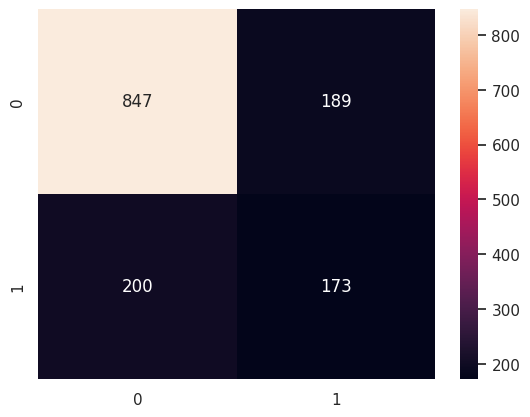

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1036
           1       0.48      0.46      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [71]:
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtc.fit(X_train, y_train)

# evaluate on test data
y_test_pred = dtc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7920511000709723


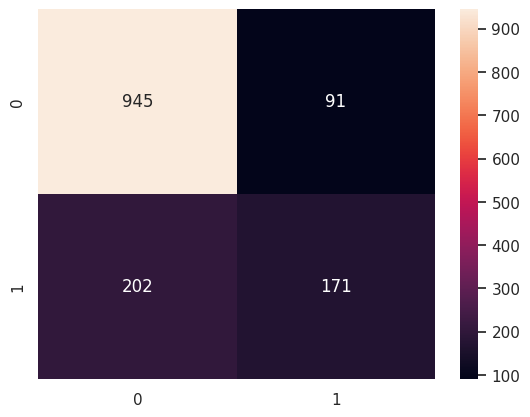

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [72]:
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)

# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7679205110007097


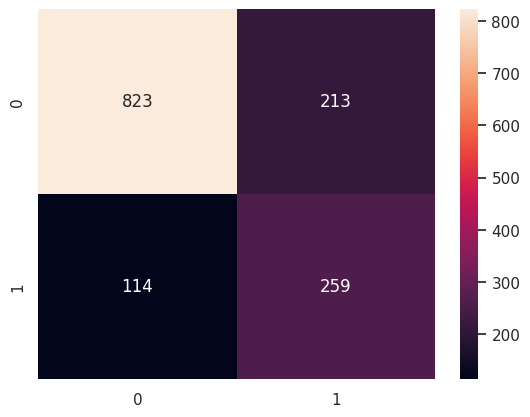

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1036
           1       0.55      0.69      0.61       373

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409



In [73]:
xgbc = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, eval_metric='logloss')
xgbc.fit(X_train, y_train)

# evaluate on test data
y_test_pred = xgbc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_test_pred))

In [ ]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

**7. Load the saved  model and  build a Predictive System**

In [ ]:
# load the saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 'No',
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.79 0.21]]


In [ ]:
encoders

{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

**To do:**
1. Implement Hyperparameter Tuining--->have to do
2. Try Model Selection ---> based on what i want out of rfc and xgbc classf scores
3. Try downsampling(suggest)
4. Try to address teh overfitting? mention imbalance
5. Try Startified k fold CV --done

6. Feature engineering--> might do but no change in classification scores
